In [1]:
from matplotlib import font_manager, rc


path = '/Library/Fonts/NanumGothic.otf'
font_name = font_manager.FontProperties(fname=path).get_name()

rc('font', family = font_name)

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 사용
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트가 깨지는 문제 해결
mpl.rcParams["axes.unicode_minus"] = False

# Dataset

### 2021 연재중인 인기순 웹툰 데이터
- row : 32242개
- column
    - weekday : 웹툰 연재 요일
    - rank : 웹툰 순위
    - title : 웹툰 제목
    - genre : 웹툰 장르
    - star : 각 회차의 평점
    - img : 각 회차의 분량
    - person : 각 회차의 평점 투표 인원 수
    - datetime : 웹툰 업로드 날짜

### 2005 ~ 2021 연도별 웹툰 데이터
- row : 331255개
- column
    - year : 웹툰 연재 년도
    - title : 웹툰 제목
    - genre : 웹툰 장르
    - star : 각 회차의 평점
    - img : 각 회차의 분량
    - person : 각 회차의 평점 투표 인원 수
    - datetime : 웹툰 업로드 날짜

#### 가설
- 가을에 로맨스 장르의 인기가 많을까?
- 평점이 낮은 회차는 분량과 참여도가 낮을 것이다
- 요일별로 인기 있는 장르가 있을까?
    - 연도별로 인기 있는 장르가 있을까?
- 상위권에 있는 웹툰는 평점과 분량이 많을까?

In [2]:
# title 공백 없애주는 함수
def title_strip(title):
    return title.strip()

In [3]:
import pickle

with open('data/every_weekly_webtoon.pkl', 'rb') as f:
    weekly_df = pickle.load(f)
    
with open('data/every_yearly_webtoon.pkl', 'rb') as f:
    yearly_df = pickle.load(f)

#### weekly, yearly df column 전처리

In [4]:
weekly_df.drop(columns="link", axis=1, inplace=True)

weekly_df['title'] = weekly_df['title'].apply(title_strip)
weekly_df['img'] = weekly_df['img'].astype('int')
weekly_df['person'] = weekly_df['person'].astype('int')
weekly_df['date'] = pd.to_datetime(weekly_df['date'], format='%Y-%m-%d', errors='raise')

weekly_df.rename(columns={'day':'weekday', 'date':'datetime'}, inplace=True)
weekly_df.tail()

,weekday,rank,title,genre,star,img,person,datetime
32237,sun,55,호시탐탐,스토리 로맨스,9.86,47,1449,2020-12-05
32238,sun,55,호시탐탐,스토리 로맨스,9.78,32,1643,2020-11-28
32239,sun,55,호시탐탐,스토리 로맨스,9.79,43,2134,2020-11-21
32240,sun,55,호시탐탐,스토리 로맨스,9.85,45,2590,2020-11-14
32241,sun,55,호시탐탐,스토리 로맨스,9.71,45,4257,2020-11-07


In [5]:
yearly_df.drop(columns='link', axis=1, inplace=True)

yearly_df['title'] = yearly_df['title'].apply(title_strip)
yearly_df['img'] = yearly_df['img'].astype('int')
yearly_df['person'] = yearly_df['person'].astype('int')
yearly_df['date'] = pd.to_datetime(yearly_df['date'], format='%Y-%m-%d', errors='raise')

yearly_df.rename(columns={'date':'datetime'}, inplace=True)
yearly_df.tail()

,year,title,genre,star,img,person,datetime
331250,2021,9등급 뒤집기,스토리 드라마,9.67,44,4916,2020-01-16
331251,2021,9등급 뒤집기,스토리 드라마,9.68,40,3802,2020-01-09
331252,2021,9등급 뒤집기,스토리 드라마,9.53,46,5076,2020-01-02
331253,2021,9등급 뒤집기,스토리 드라마,8.89,64,7815,2019-12-26
331254,2021,9등급 뒤집기,스토리 드라마,5.94,89,12699,2019-12-19


#### datetime column -> 세분화

In [6]:
weekly_df['year'] = weekly_df['datetime'].dt.year
weekly_df['quarter'] = weekly_df['datetime'].dt.quarter
weekly_df['month'] = weekly_df['datetime'].dt.month
weekly_df['day'] = weekly_df['datetime'].dt.day

weekly_df = weekly_df[['rank', 'title', 'genre', 'star', 'img', 'person', 'datetime', 'year', 'quarter', 'month', 'day', 'weekday']]
print(weekly_df.shape)
weekly_df.tail()

(32242, 12)


,rank,title,genre,star,img,person,datetime,year,quarter,month,day,weekday
32237,55,호시탐탐,스토리 로맨스,9.86,47,1449,2020-12-05,2020,4,12,5,sun
32238,55,호시탐탐,스토리 로맨스,9.78,32,1643,2020-11-28,2020,4,11,28,sun
32239,55,호시탐탐,스토리 로맨스,9.79,43,2134,2020-11-21,2020,4,11,21,sun
32240,55,호시탐탐,스토리 로맨스,9.85,45,2590,2020-11-14,2020,4,11,14,sun
32241,55,호시탐탐,스토리 로맨스,9.71,45,4257,2020-11-07,2020,4,11,7,sun


In [7]:
yearly_df['date_year'] = yearly_df['datetime'].dt.year
yearly_df['quarter'] = yearly_df['datetime'].dt.quarter
yearly_df['month'] = yearly_df['datetime'].dt.month
yearly_df['day'] = yearly_df['datetime'].dt.day

yearly_df = yearly_df[['year', 'title', 'genre','star', 'img', 'person', 'datetime', 'date_year', 'quarter', 'month', 'day']]
print(yearly_df.shape)
yearly_df.head()

(331255, 11)


,year,title,genre,star,img,person,datetime,date_year,quarter,month,day
0,2005,골방환상곡,에피소드 일상,9.86,1,3454,2008-12-24,2008,4,12,24
1,2005,골방환상곡,에피소드 일상,9.81,1,2220,2008-11-04,2008,4,11,4
2,2005,골방환상곡,에피소드 일상,9.81,1,1763,2008-09-08,2008,3,9,8
3,2005,골방환상곡,에피소드 일상,9.85,1,1599,2008-05-02,2008,2,5,2
4,2005,골방환상곡,에피소드 일상,9.88,1,1810,2008-04-30,2008,2,4,30


In [8]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32242 entries, 0 to 32241
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   rank      32242 non-null  object        
 1   title     32242 non-null  object        
 2   genre     32242 non-null  object        
 3   star      32242 non-null  float64       
 4   img       32242 non-null  int64         
 5   person    32242 non-null  int64         
 6   datetime  32242 non-null  datetime64[ns]
 7   year      32242 non-null  int64         
 8   quarter   32242 non-null  int64         
 9   month     32242 non-null  int64         
 10  day       32242 non-null  int64         
 11  weekday   32242 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 3.2+ MB


In [9]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331255 entries, 0 to 331254
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   year       331255 non-null  object        
 1   title      331255 non-null  object        
 2   genre      331255 non-null  object        
 3   star       331255 non-null  float64       
 4   img        331255 non-null  int64         
 5   person     331255 non-null  int64         
 6   datetime   331255 non-null  datetime64[ns]
 7   date_year  331255 non-null  int64         
 8   quarter    331255 non-null  int64         
 9   month      331255 non-null  int64         
 10  day        331255 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 27.8+ MB


### 요일별 및 장르별 웹툰 빈도분석

In [10]:
week_genre = weekly_df.groupby(['title', 'weekday', 'genre']).size().groupby(['weekday', 'genre']).size().reset_index(name='count')
week_genre

,weekday,genre,count
0,fri,스토리 개그,2
1,fri,스토리 드라마,16
2,fri,스토리 로맨스,7
3,fri,스토리 스릴러,5
4,fri,스토리 시대극,1
...,...,...,...
88,wed,에피소드 드라마,1
89,wed,에피소드 로맨스,1
90,wed,에피소드 스릴러,1
91,wed,에피소드 일상,3


In [11]:
week_len = week_genre.groupby('weekday').sum()
week_len.index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
week_len.reset_index(inplace=True)
week_len.rename(columns={'index':'weekday'}, inplace=True)

week_per_len = weekly_df.groupby('weekday').size()
week_per_len.index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
week_per_len = week_per_len.reset_index(name='count')
week_per_len.rename(columns={'index':'weekday'}, inplace=True)

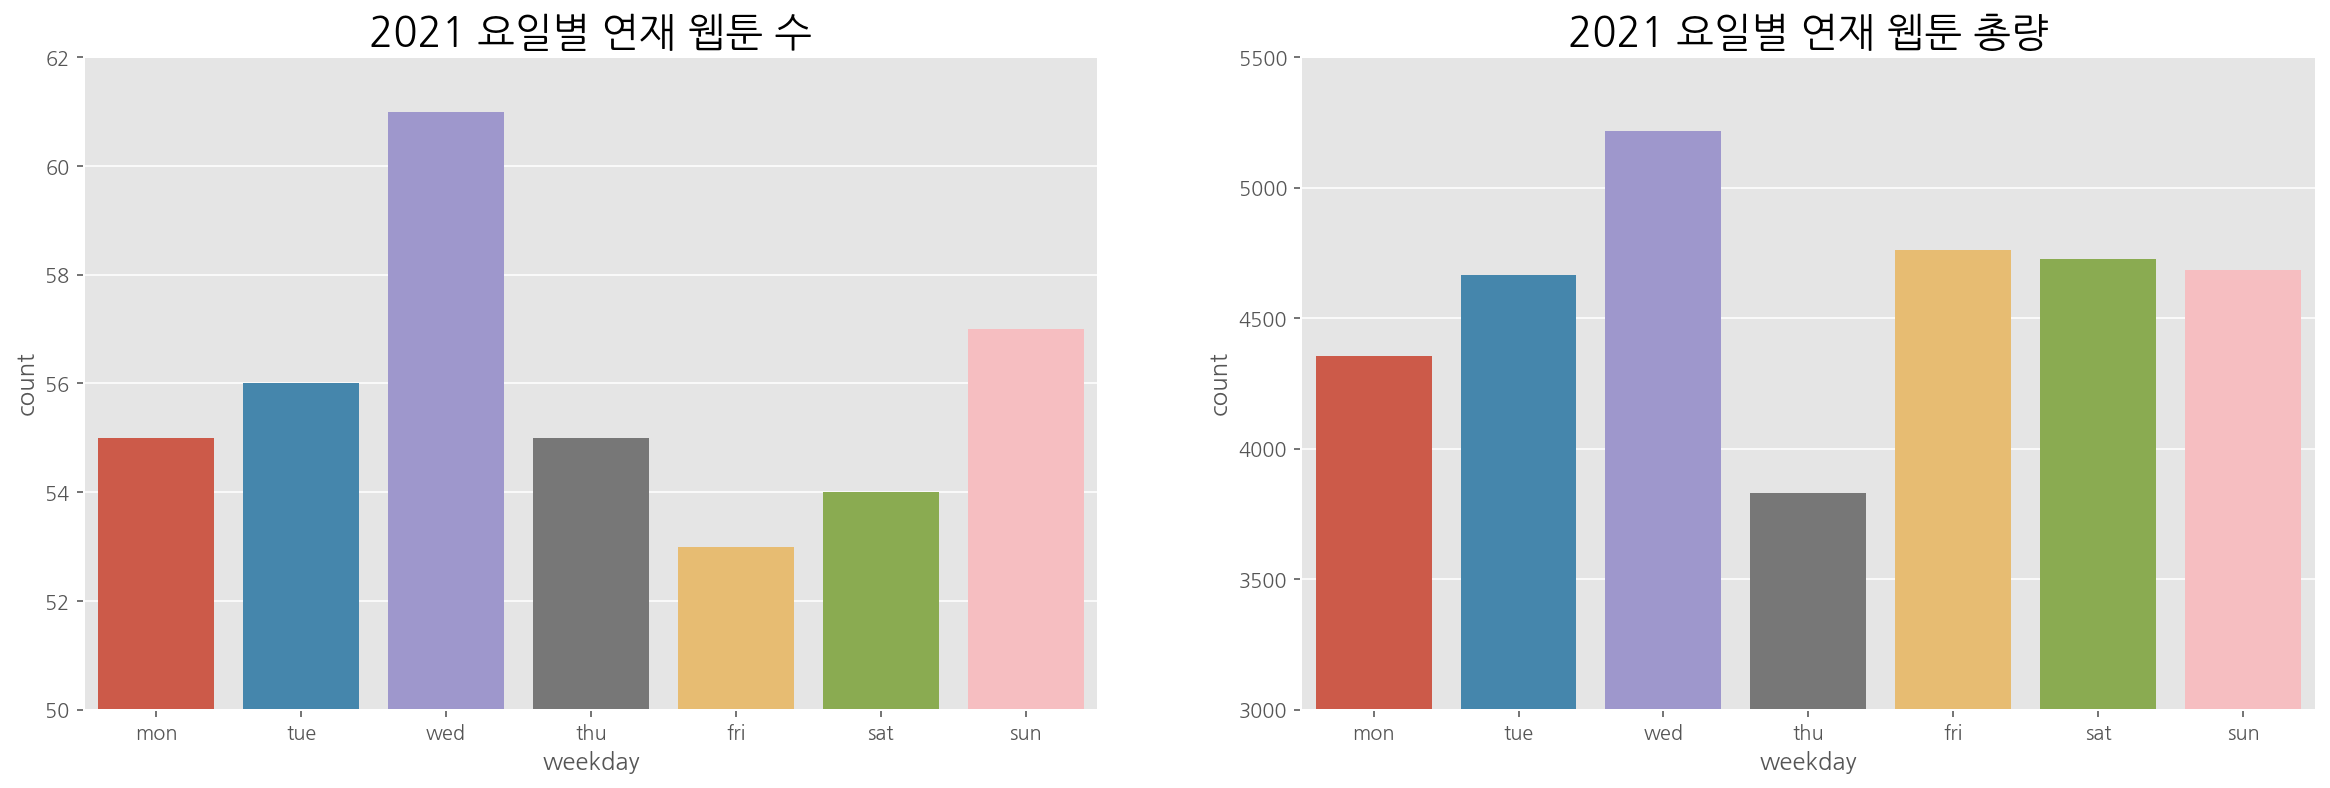

In [12]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.barplot(data=week_len, x='weekday', y='count')
plt.ylim((50, 62))
plt.title("2021 요일별 연재 웹툰 수", fontsize=20)

plt.subplot(122)
sns.barplot(data=week_per_len, x='weekday', y='count')
plt.ylim((3000, 5500))
plt.title("2021 요일별 연재 웹툰 총량", fontsize=20)

plt.show()

In [13]:
genre_count = week_genre.groupby('genre').sum().reset_index()
genre_count.sort_values('genre', inplace=True)

genre_all_count = weekly_df.groupby('genre').size().reset_index(name='count')
genre_all_count.sort_values('genre', inplace=True)

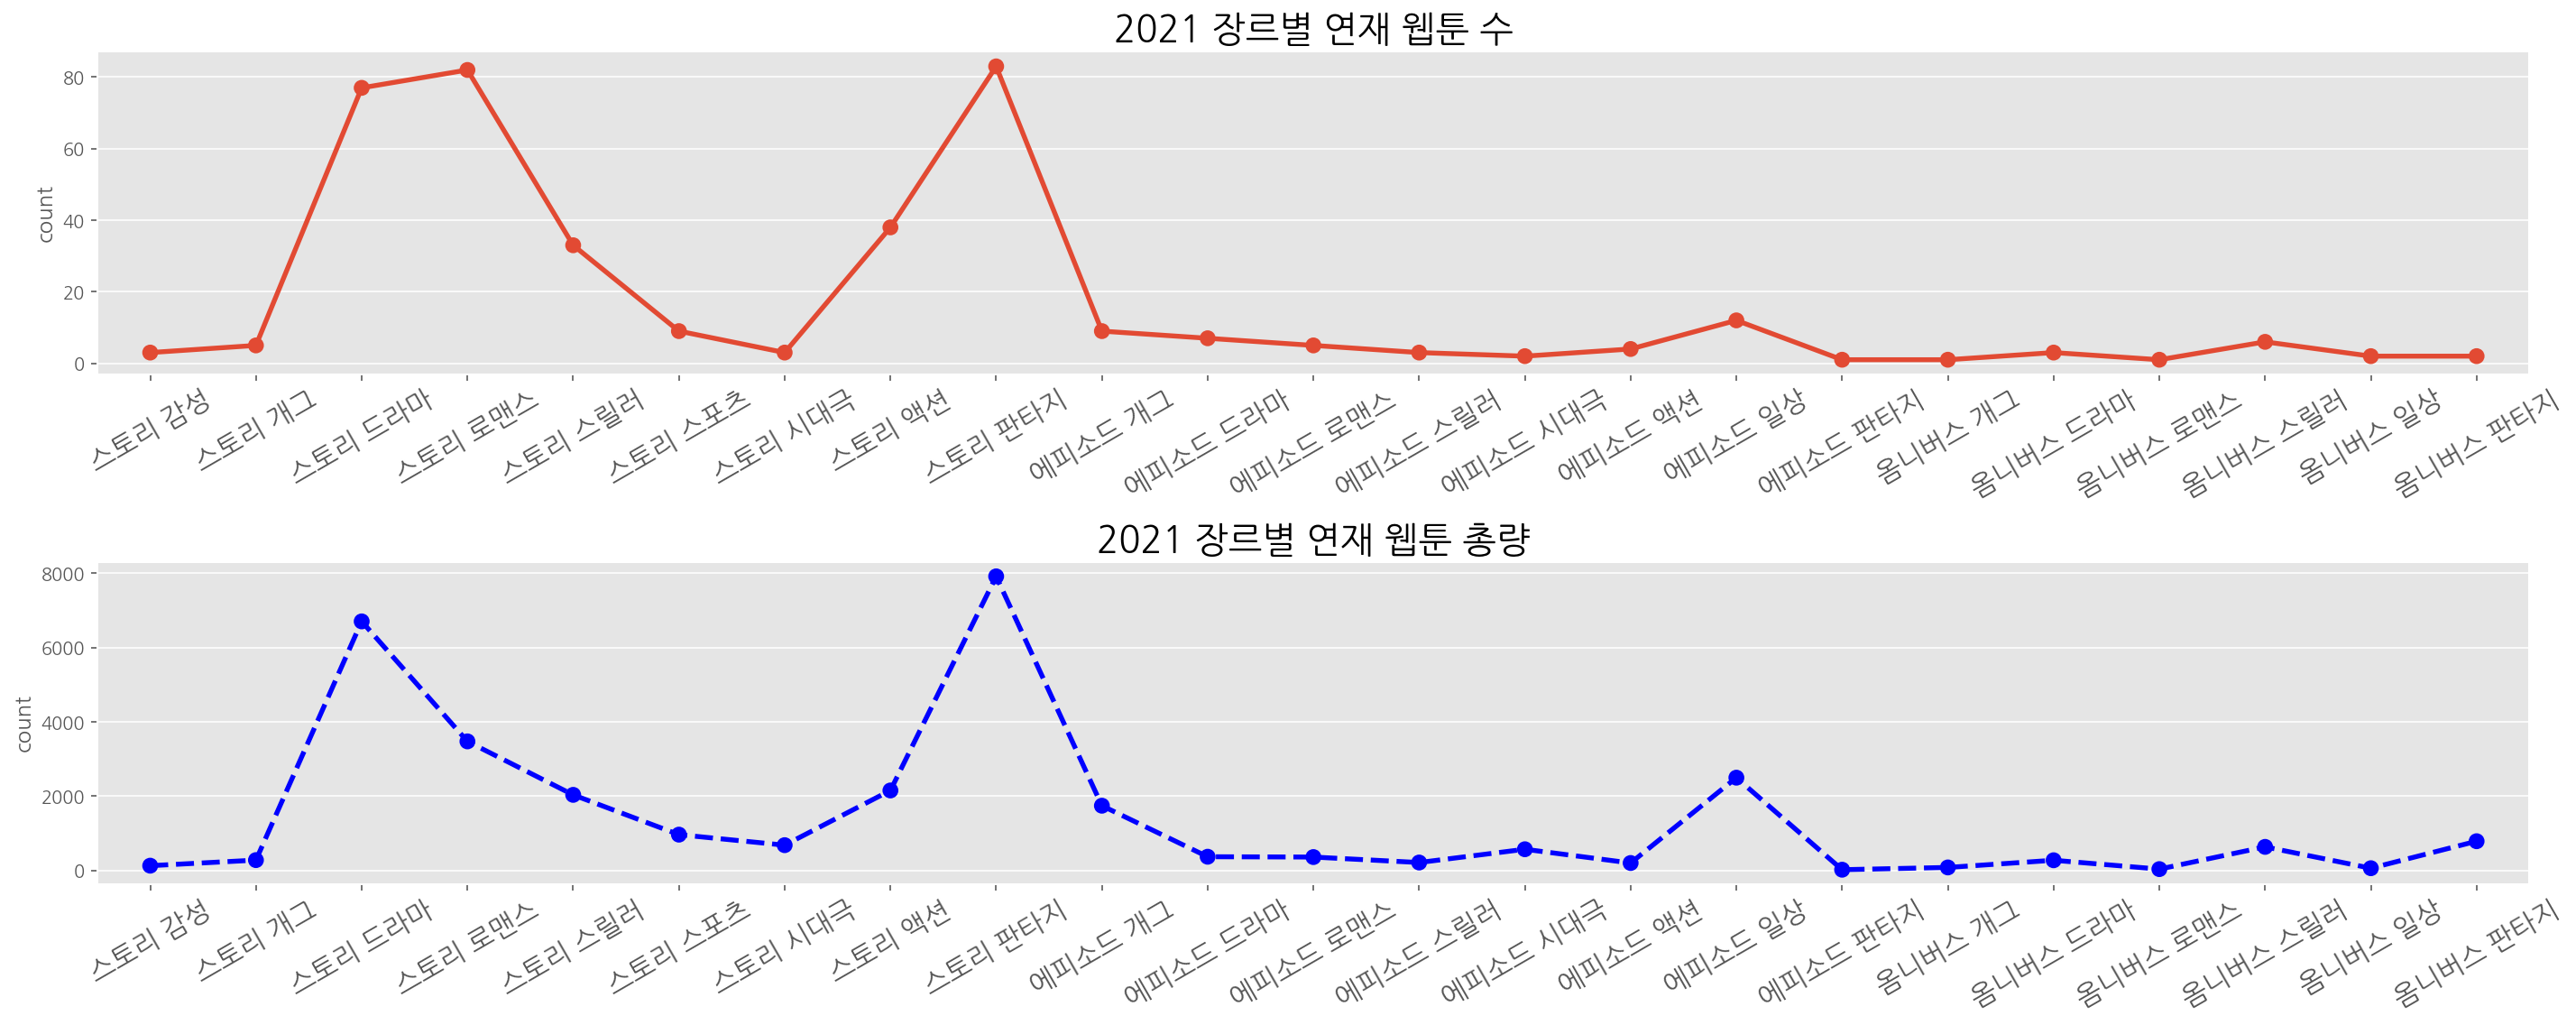

In [14]:
plt.figure(figsize=(20, 8))

plt.subplot(211)
sns.pointplot(data=genre_count, x='genre', y='count')
plt.title('2021 장르별 연재 웹툰 수', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=15)

plt.subplot(212)
sns.pointplot(data=genre_all_count, x='genre', y='count', color='blue', linestyles='--')
plt.title('2021 장르별 연재 웹툰 총량', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=15)

plt.tight_layout()
plt.show()

In [15]:
genre_mean = weekly_df.groupby('genre').agg('mean').round(2)[['star', 'img', 'person']].reset_index()
genre_mean.sort_values('genre', inplace=True)
genre_mean.tail(2)

,genre,star,img,person
21,옴니버스 일상,9.92,25.89,7018.77
22,옴니버스 판타지,9.96,9.98,5139.53


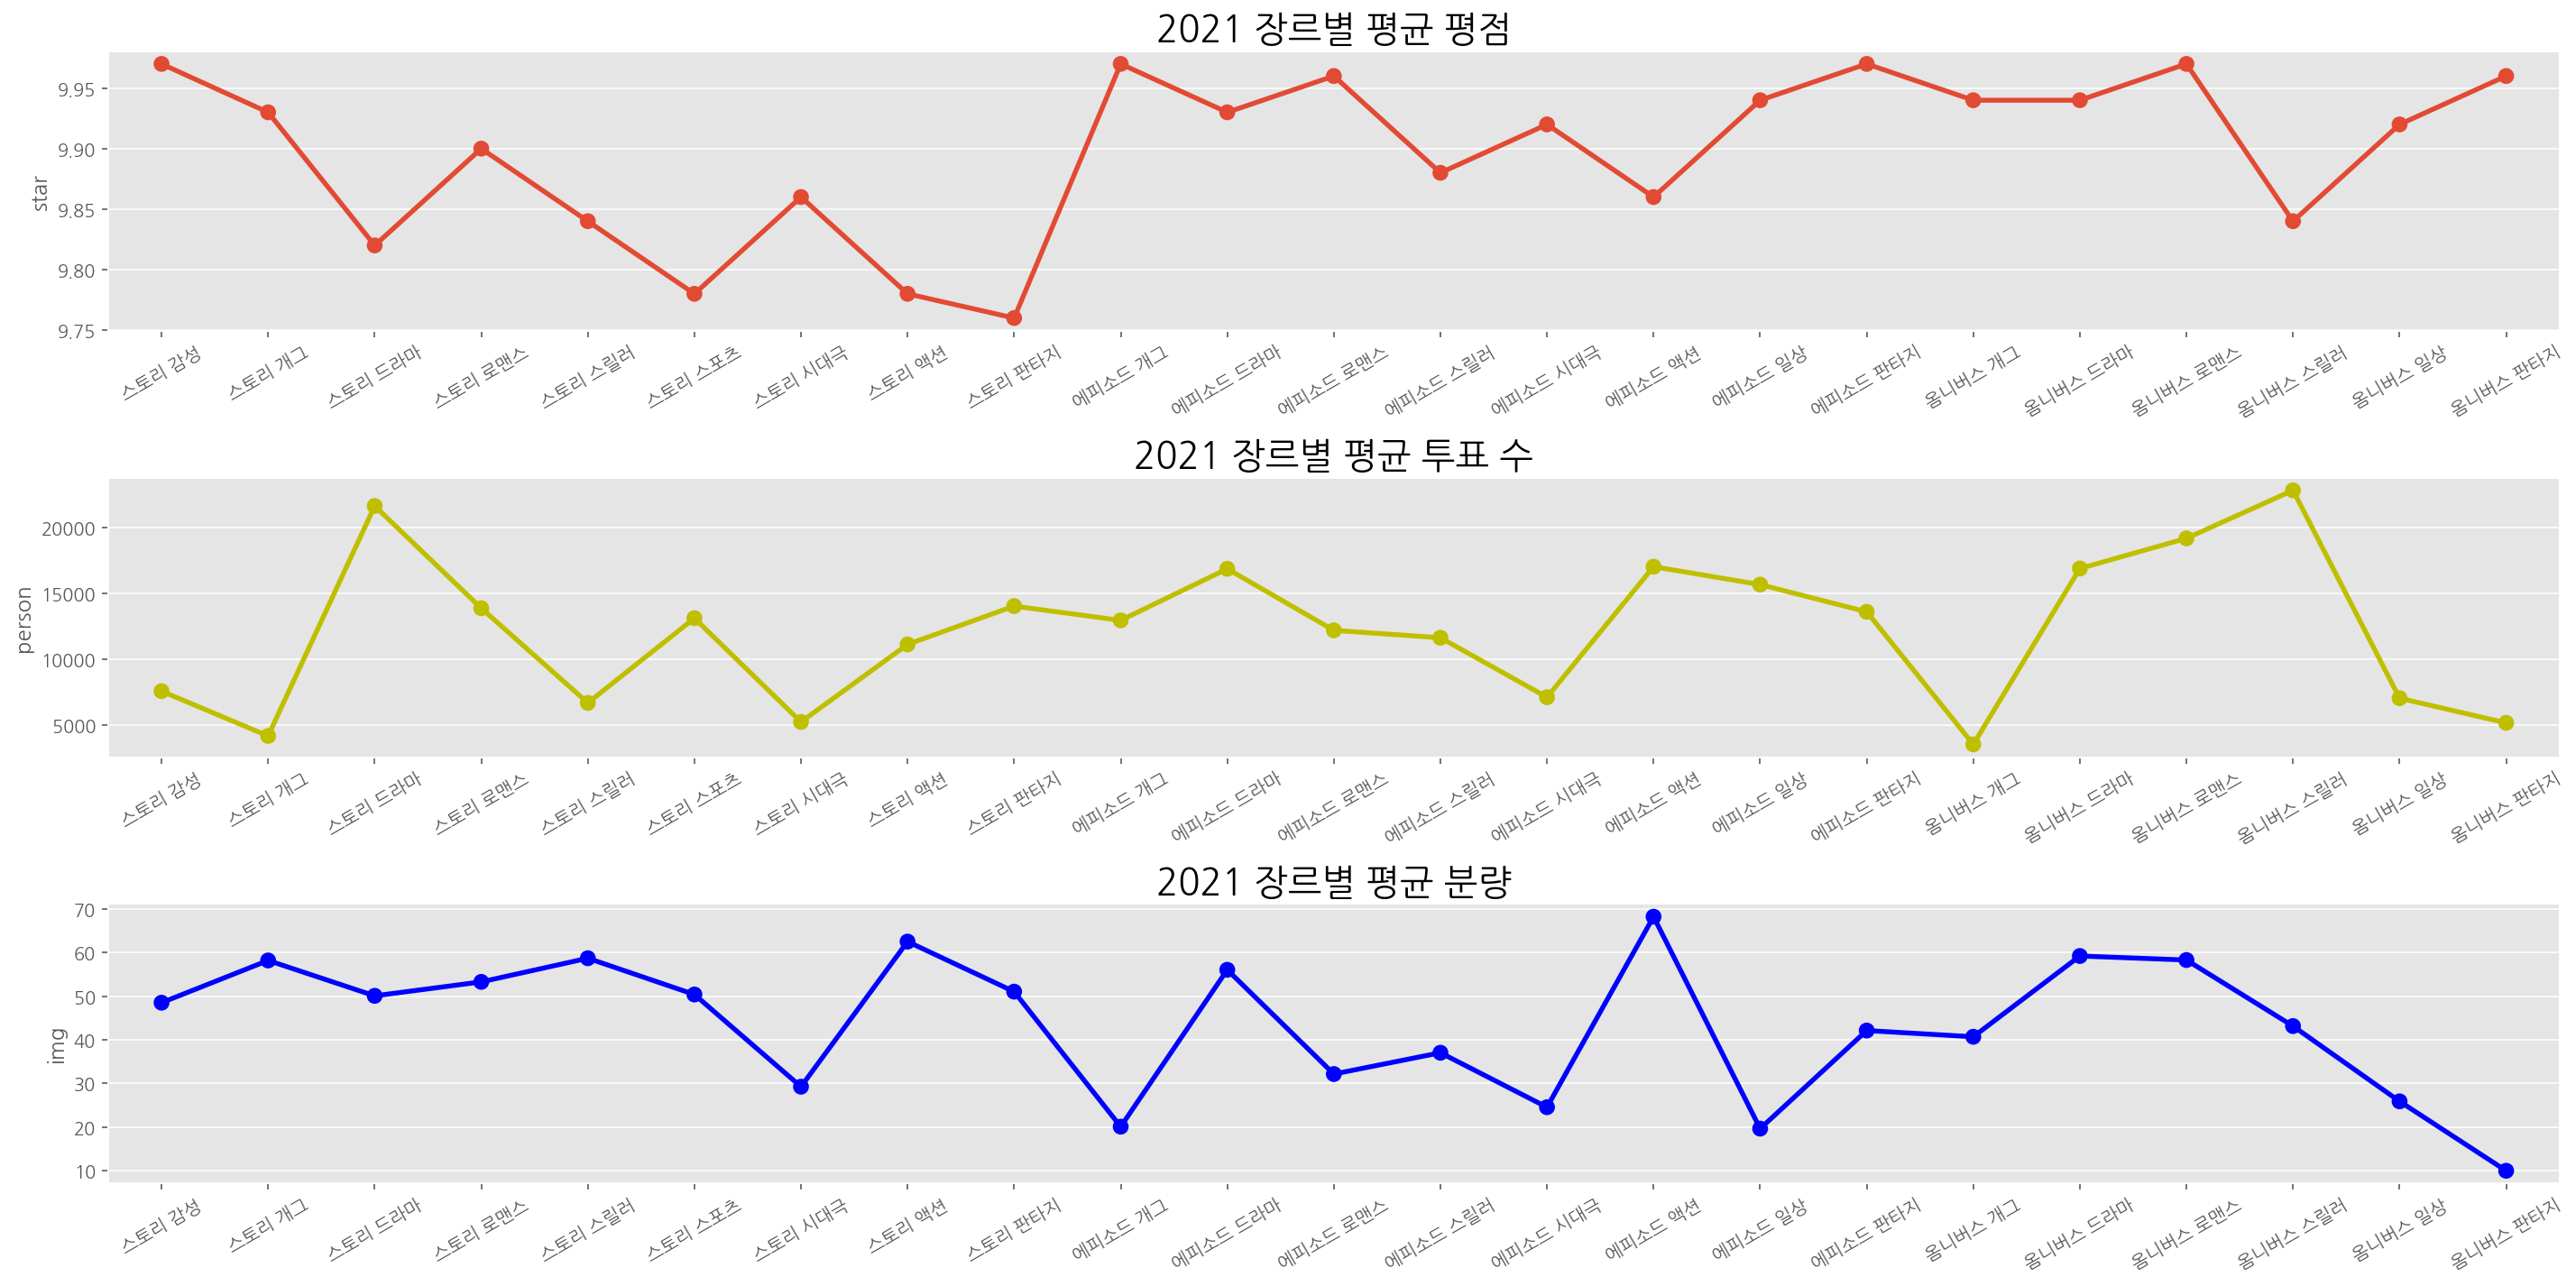

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(311)
sns.pointplot(data=genre_mean, x='genre', y='star')
plt.title('2021 장르별 평균 평점', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=10)

plt.subplot(312)
sns.pointplot(data=genre_mean, x='genre', y='person', color='y')
plt.title('2021 장르별 평균 투표 수', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=10)

plt.subplot(313)
sns.pointplot(data=genre_mean, x='genre', y='img', color='b')
plt.title('2021 장르별 평균 분량', fontsize=20)
plt.xlabel(None)
plt.xticks(rotation=30, fontsize=10)

plt.tight_layout()
plt.show()

#### genre 세분화
- genre1 : 큰 카테고리 -> 스토리, 에피소드, 옴니버스
- genre2 : 세부 카테고리 -> 감성, 개그, 드라마, 로맨스, 스릴러, 스포츠, 시대극, 액션, 판타지, 일상

In [17]:
# genre를 두 개로 나눠주는 함수
def split_genre1(genre):
    return genre.split()[0]

def split_genre2(genre):
    return genre.split()[1]

In [18]:
weekly_df['genre1'] = weekly_df['genre'].apply(split_genre1)
weekly_df['genre2'] = weekly_df['genre'].apply(split_genre2)

yearly_df['genre1'] = yearly_df['genre'].apply(split_genre1)
yearly_df['genre2'] =yearly_df['genre'].apply(split_genre2)

In [19]:
weekly_df = weekly_df[[
    'rank', 'title', 'genre', 'genre1', 'genre2', 'star', 'img', 'person', 'datetime', 'year', 'quarter', 'month', 'day', 'weekday']]

yearly_df = yearly_df[[
    'year', 'title', 'genre', 'genre1', 'genre2', 'star', 'img', 'person', 'datetime', 'date_year', 'quarter', 'month', 'day']]

In [20]:
weekly_df.tail(2)

,rank,title,genre,genre1,genre2,star,img,person,datetime,year,quarter,month,day,weekday
32240,55,호시탐탐,스토리 로맨스,스토리,로맨스,9.85,45,2590,2020-11-14,2020,4,11,14,sun
32241,55,호시탐탐,스토리 로맨스,스토리,로맨스,9.71,45,4257,2020-11-07,2020,4,11,7,sun


In [21]:
yearly_df.tail(2)

,year,title,genre,genre1,genre2,star,img,person,datetime,date_year,quarter,month,day
331253,2021,9등급 뒤집기,스토리 드라마,스토리,드라마,8.89,64,7815,2019-12-26,2019,4,12,26
331254,2021,9등급 뒤집기,스토리 드라마,스토리,드라마,5.94,89,12699,2019-12-19,2019,4,12,19


In [22]:
# week_genre = weekly_df.groupby(['title', 'weekday', 'genre']).size().groupby(['weekday', 'genre']).size().reset_index(name='count')

In [23]:
result1 = weekly_df.groupby(['weekday', 'title', 'genre1', 'genre2']).size().groupby('genre1').size().reset_index(name='count')
result2 = weekly_df.groupby(['weekday', 'title', 'genre1', 'genre2']).size().groupby('genre2').size().reset_index(name='count')
result2.sort_values('count', ascending=False, inplace=True)

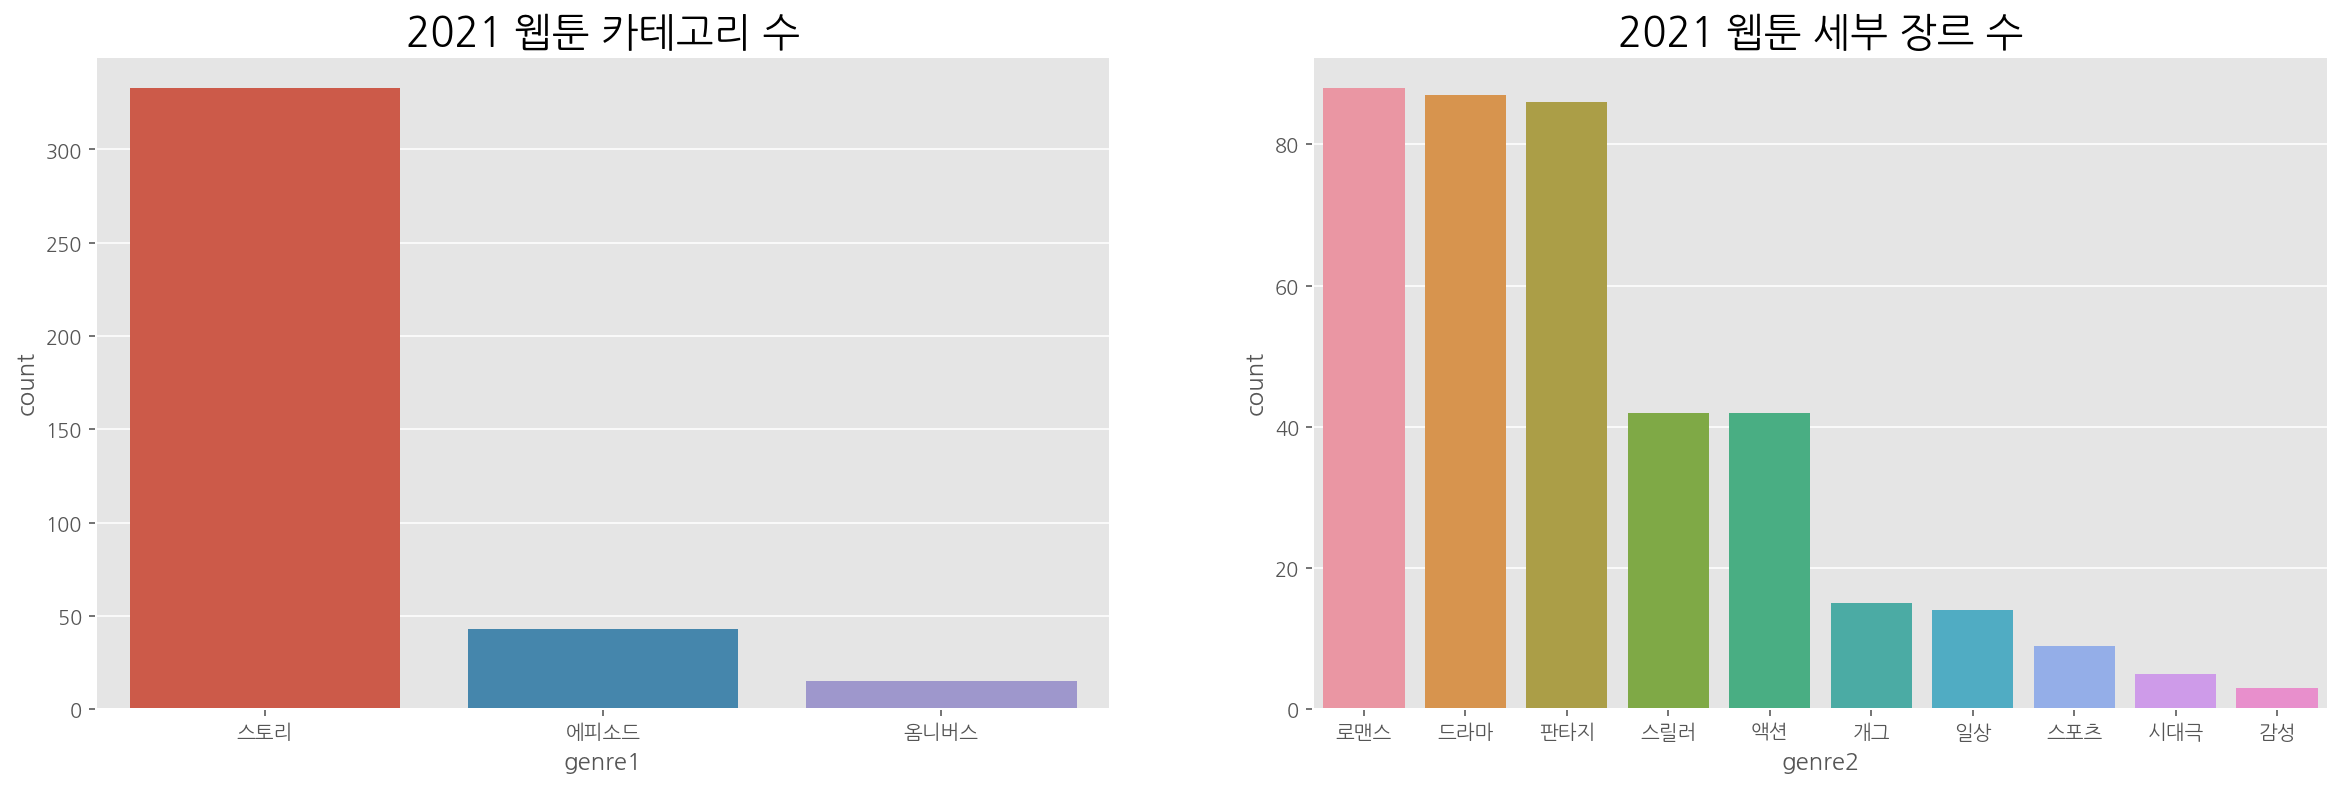

In [24]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.barplot(data=result1, x='genre1', y='count')
plt.title('2021 웹툰 카테고리 수', fontsize=20)

plt.subplot(122)
sns.barplot(data=result2, x='genre2', y='count')
plt.title('2021 웹툰 세부 장르 수', fontsize=20)

plt.show()

In [23]:
# genre_mean = weekly_df.groupby('genre').agg('mean').round(2)[['star', 'img', 'person']].reset_index()

In [25]:
result = weekly_df.groupby('genre1').agg('mean').round(2)[['star', 'img', 'person']].reset_index()
result.sort_values('star', inplace=True)
result.reset_index(drop=True, inplace=True)
result

,genre1,star,img,person
0,스토리,9.81,52.17,14803.60
1,옴니버스,9.91,31.30,13117.00
2,에피소드,9.94,25.63,13815.59


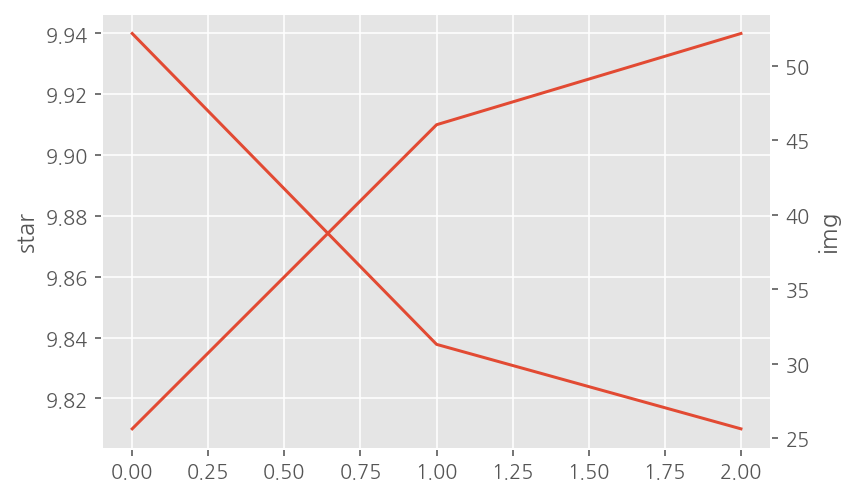

In [26]:
fig, ax1 = plt.subplots()

ax1.plot(result['star'])
ax1.set_ylabel('star')

ax2 = ax1.twinx()
ax2.plot(result['img'])
ax2.set_ylabel('img')


plt.grid(False)

In [52]:
weekly_df.groupby('genre2').agg('mean').round(2)[['star', 'img', 'person']].reset_index()

,genre2,star,img,person
0,감성,9.97,48.50,7556.71
1,개그,9.96,26.01,11392.73
2,드라마,9.83,50.72,21240.96
3,로맨스,9.90,51.34,13771.63
4,스릴러,9.84,53.63,10606.52
5,스포츠,9.78,50.38,13116.41
6,시대극,9.88,27.11,6069.27
7,액션,9.79,63.00,11630.37
8,일상,9.94,19.79,15457.77
9,판타지,9.78,47.29,13230.50


In [53]:
weekly_df.groupby(['genre1','genre2']).agg('mean').round(2)[['star', 'img', 'person']].reset_index()

,genre1,genre2,star,img,person
0,스토리,감성,9.97,48.50,7556.71
1,스토리,개그,9.93,58.18,4141.22
2,스토리,드라마,9.82,50.07,21663.84
3,스토리,로맨스,9.90,53.27,13875.01
4,스토리,스릴러,9.84,58.69,6660.81
5,스토리,스포츠,9.78,50.38,13116.41
6,스토리,시대극,9.86,29.25,5209.81
7,스토리,액션,9.78,62.50,11118.38
8,스토리,판타지,9.76,51.03,14037.14
9,에피소드,개그,9.97,20.09,12949.13


#### weekly_df의 rank의 분포 파악

In [27]:
result = weekly_df.groupby(['rank', 'title']).size().reset_index()[['rank', 'title']].groupby('rank').size().reset_index(name='count')
result

,rank,count
0,1,6
1,2,7
2,3,7
3,4,7
4,5,7
...,...,...
56,57,2
57,58,1
58,59,1
59,60,1


<AxesSubplot:xlabel='rank', ylabel='count'>

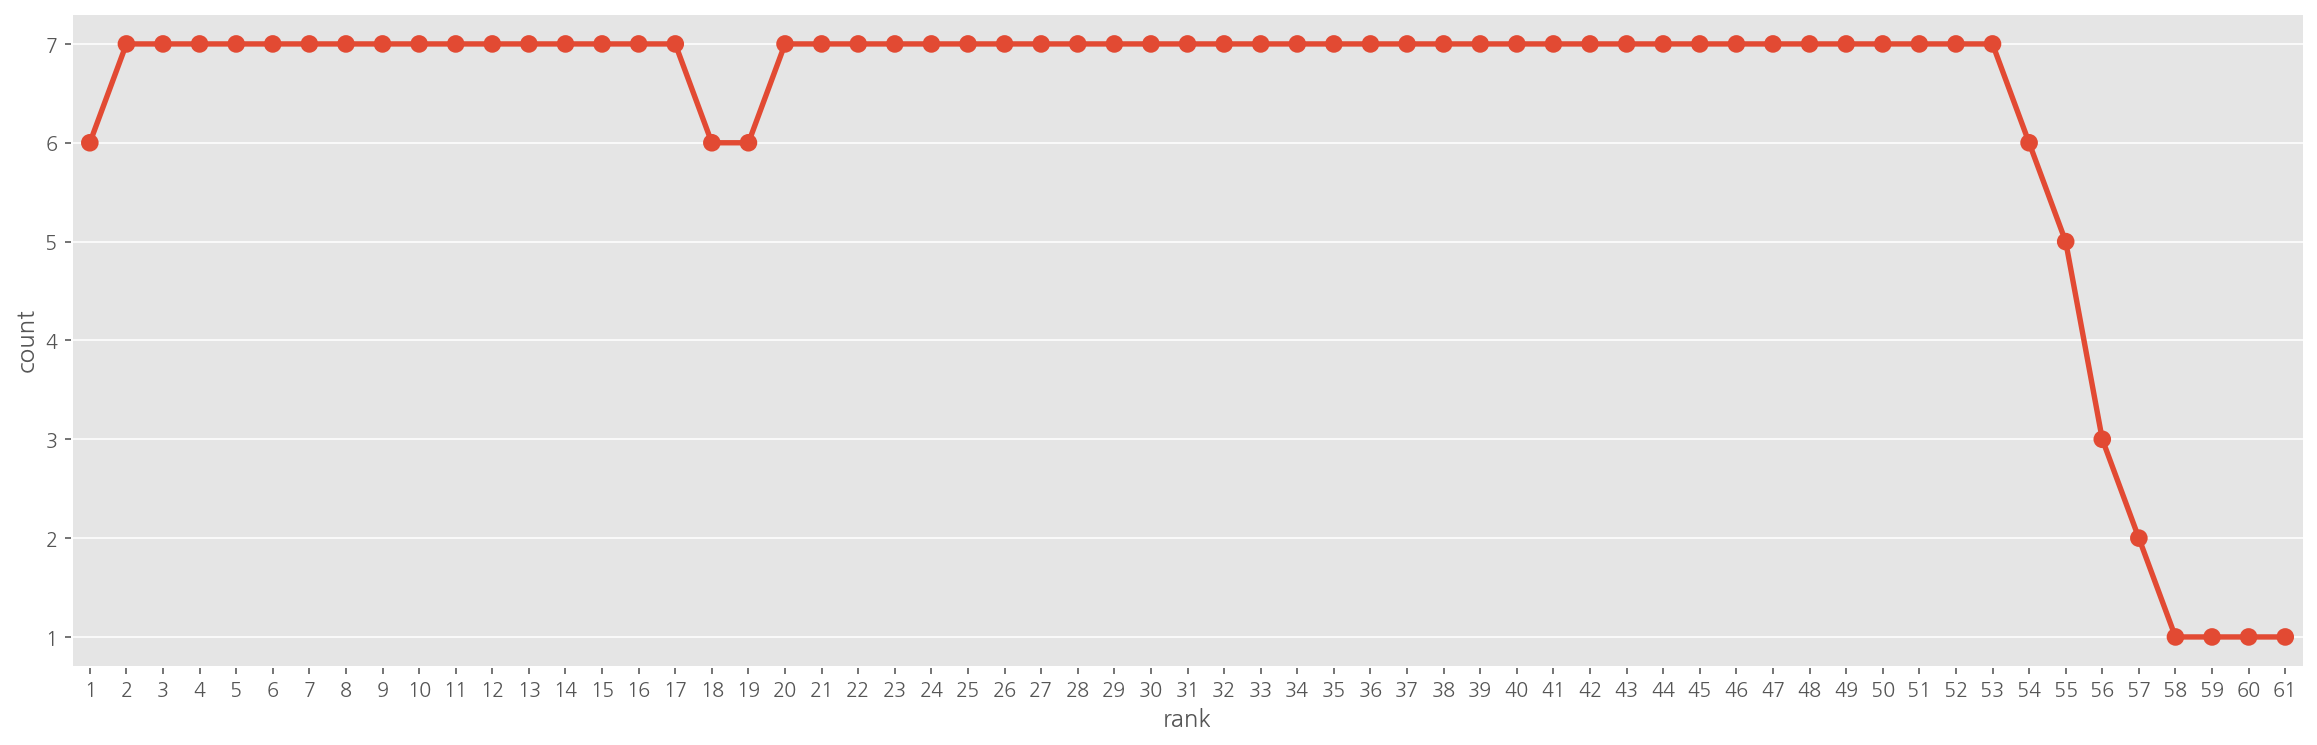

In [29]:
plt.figure(figsize=(20, 6))
sns.pointplot(data=result, x='rank', y='count') # count=6인 rank는 중복된 웹툰 존재해서

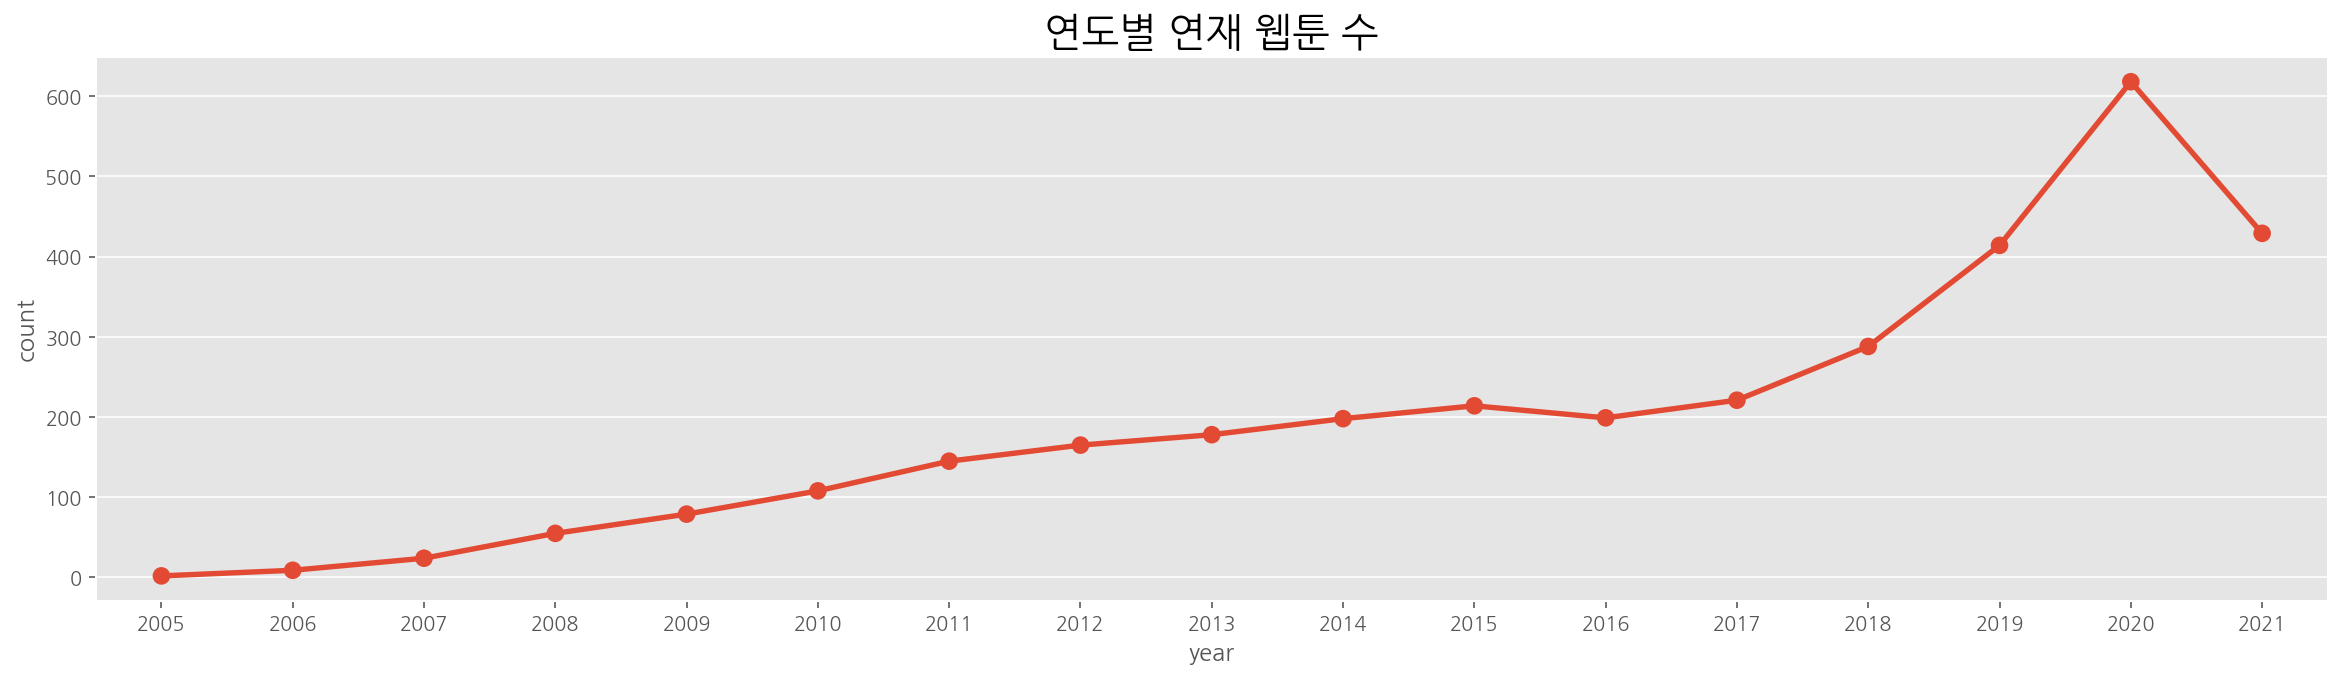

In [18]:
result = yearly_df.groupby(['year', 'title']).size().reset_index().groupby('year').size().reset_index(name='count')

plt.figure(figsize=(20, 5))
sns.pointplot(data=result, x='year', y='count');
plt.title('연도별 연재 웹툰 수', fontsize=20);

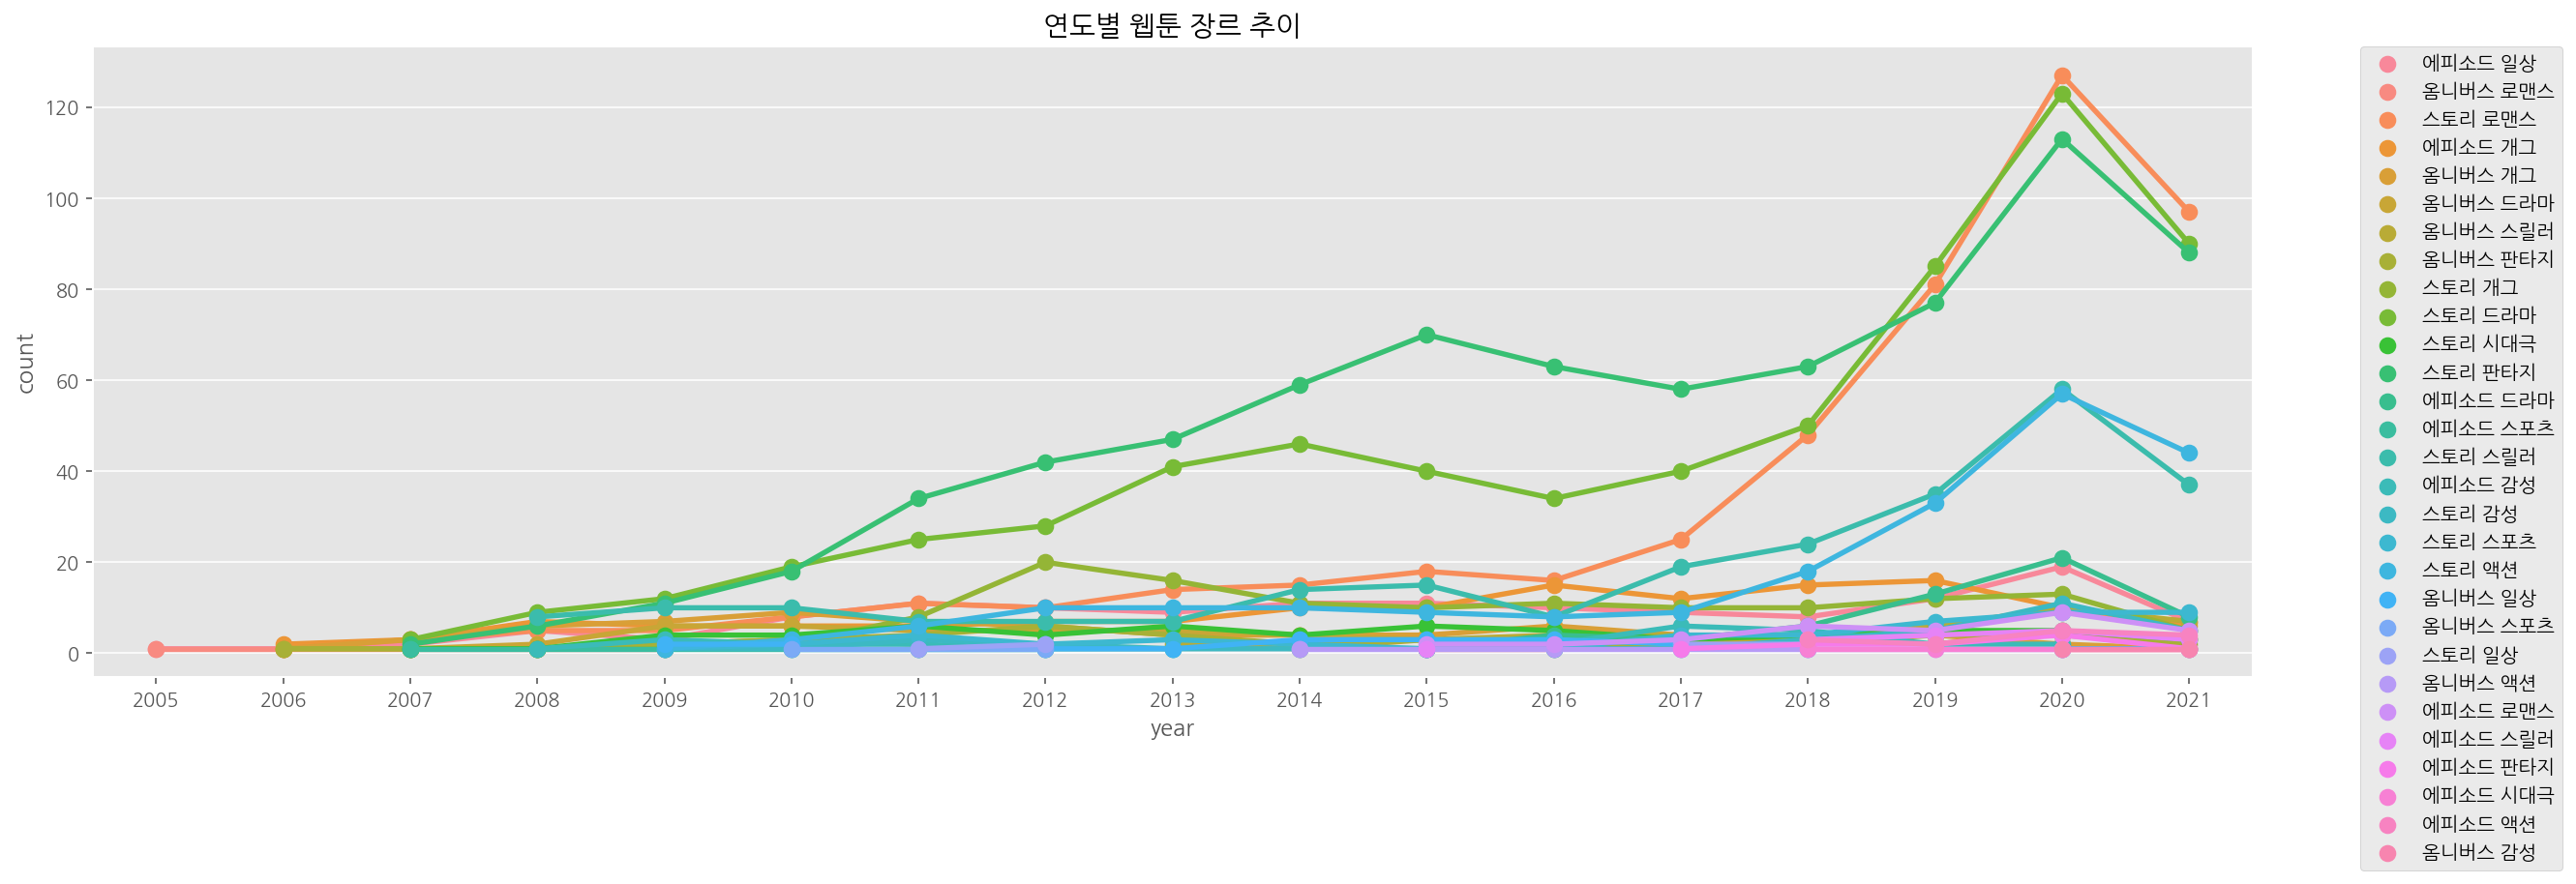

In [19]:
result = yearly_df.groupby(['year', 'title', 'genre']).size().reset_index().groupby(['year', 'genre']).size().reset_index(name='count')

plt.figure(figsize=(20, 6))
sns.pointplot(data=result, x='year', y='count', hue='genre')
plt.title('연도별 웹툰 장르 추이')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [72]:
yearly_df.groupby(['year','month', 'title', 'genre']).size().reset_index().groupby(['year', 'month', 'genre']).size().reset_index().head(40)

,year,month,genre,0
0,2005,1,에피소드 일상,1
1,2005,2,에피소드 일상,1
2,2005,3,에피소드 일상,1
3,2005,4,에피소드 일상,1
4,2005,5,에피소드 일상,1
5,2005,6,에피소드 일상,1
6,2005,7,에피소드 일상,1
7,2005,8,에피소드 일상,1
8,2005,9,에피소드 일상,1
9,2005,10,에피소드 일상,1


### 평점과 분량과 참여도간의 상관관계 분석
- img : 0, 1인 웹툰 삭제
    - 331255 -> 313467 : 17788 row 손실

In [26]:
result = yearly_df[yearly_df['img'] != 0]
result = yearly_df[yearly_df['img'] != 1]

print(result.shape)

(313467, 11)


In [42]:
corr_df = pd.DataFrame(columns=['genre', 'title', 'star_img', 'star_person', 'img_person'])
corr_df

,genre,title,star_img,star_person,img_person


In [41]:
result[result['title'] == '골방환상곡']['genre'].unique()[0]

'에피소드 일상'

In [43]:
for idx in range(len(result['title'].unique())):
    data = result[result['title'] == result['title'].unique()[idx]][['star', 'img', 'person']]
    data_corr = data.corr().round(4)
    
    title = result['title'].unique()[idx]
    genre = result[result['title'] == title]['genre'].unique()[0]
    star_img = data_corr.iloc[0, 1]
    star_person = data_corr.iloc[0, 2]
    img_person = data_corr.iloc[1, 2]
    
    row = {
        'genre': genre,
        'title': title,
        'star_img': star_img,
        'star_person': star_person,
        'img_person': img_person
    }
    
    corr_df.loc[len(corr_df)] = row

In [44]:
corr_df

,genre,title,star_img,star_person,img_person
0,에피소드 일상,골방환상곡,-0.3151,-0.0932,0.4531
1,옴니버스 로맨스,사랑in,0.3379,-0.3124,0.3580
2,에피소드 개그,마음의소리,-0.5535,-0.9196,0.4708
3,옴니버스 스릴러,수사9단,0.8983,-0.8009,-0.9808
4,에피소드 개그,와탕카,NaN,NaN,NaN
...,...,...,...,...,...
1286,스토리 드라마,하루달콤 하루쌉,0.2481,-0.4477,-0.4503
1287,스토리 액션,화산귀환,-1.0000,-1.0000,1.0000
1288,에피소드 드라마,환상의 용,-0.2889,-0.9821,0.3716
1289,스토리 액션,히어로 킬러,0.2032,-0.9526,-0.4175


In [45]:
corr_df = corr_df[np.all(corr_df.notnull(), axis=1)]
corr_df

,genre,title,star_img,star_person,img_person
0,에피소드 일상,골방환상곡,-0.3151,-0.0932,0.4531
1,옴니버스 로맨스,사랑in,0.3379,-0.3124,0.3580
2,에피소드 개그,마음의소리,-0.5535,-0.9196,0.4708
3,옴니버스 스릴러,수사9단,0.8983,-0.8009,-0.9808
5,옴니버스 개그,입시명문사립 정...,0.2181,-0.3423,0.0688
...,...,...,...,...,...
1286,스토리 드라마,하루달콤 하루쌉,0.2481,-0.4477,-0.4503
1287,스토리 액션,화산귀환,-1.0000,-1.0000,1.0000
1288,에피소드 드라마,환상의 용,-0.2889,-0.9821,0.3716
1289,스토리 액션,히어로 킬러,0.2032,-0.9526,-0.4175


In [46]:
corr_df.groupby('genre').agg('mean')

,star_img,star_person,img_person
genre,,,
스토리 감성,0.016307,-0.423087,-0.076820
스토리 개그,-0.089622,-0.538407,0.050561
스토리 드라마,-0.012470,-0.442242,0.048993
스토리 로맨스,-0.094243,-0.483530,0.133635
스토리 스릴러,-0.039814,-0.303960,0.172906
스토리 스포츠,0.035057,-0.306986,0.009250
스토리 시대극,0.116806,-0.267725,-0.047231
스토리 액션,-0.089438,-0.451020,0.230338
스토리 일상,-0.013117,-0.003700,-0.379017


In [57]:
total_star_img = np.mean(corr_df['star_img'])
total_star_person = np.mean(corr_df['star_person'])
total_img_person = np.mean(corr_df['img_person'])
total_star_img, total_star_person, total_img_person

(-0.040292301458670986, -0.40133922204213934, 0.08559732576985413)

#### 평점이 낮은 회차와 아닌 회차의 분류
- 각 웹툰별 평점의 분위수가 1분위수보다 작은 회차 -> lower / 1분위수보다 크면 normal
- normal인 웹툰들과 어떤 차이가 존재하는지

In [5]:
weekly_df["low_star"] = weekly_df.apply(
    lambda x: "lower" if x['star'] < np.percentile(weekly_df[weekly_df['title'] == x['title']]['star'], 25) else "normal"
    , axis=1)

In [7]:
weekly_df.head()

,rank,title,genre,star,img,person,datetime,year,quarter,month,day,weekday,low_star
0,1,참교육,스토리 액션,9.20,85,33570,2021-03-28,2021,1,3,28,mon,lower
1,1,참교육,스토리 액션,9.70,85,19922,2021-03-21,2021,1,3,21,mon,normal
2,1,참교육,스토리 액션,9.50,82,19273,2021-03-14,2021,1,3,14,mon,lower
3,1,참교육,스토리 액션,9.94,91,20275,2021-03-07,2021,1,3,7,mon,normal
4,1,참교육,스토리 액션,9.95,86,23133,2021-02-28,2021,1,2,28,mon,normal


In [9]:
lowstar_webtoon = weekly_df[weekly_df['low_star'] == 'lower']
lowstar_webtoon.reset_index(drop=True, inplace=True)
lowstar_webtoon

,star,img,person
0,9.20,85,33570
1,9.50,82,19273
2,9.68,73,24035
3,9.66,82,24180
4,9.40,95,32725
...,...,...,...
6519,9.50,35,370
6520,9.62,33,446
6521,9.68,33,489
6522,9.61,37,618


In [10]:
lowstar_webtoon['star'].value_counts()

9.95    394
9.96    392
9.94    333
9.97    326
9.93    304
       ... 
6.27      1
8.53      1
7.70      1
4.60      1
3.78      1
Name: star, Length: 427, dtype: int64